<a href="https://colab.research.google.com/github/DanielFirman/charges_insurance/blob/main/charge_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
import pickle
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.duplicated().sum()

1

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


# EDA

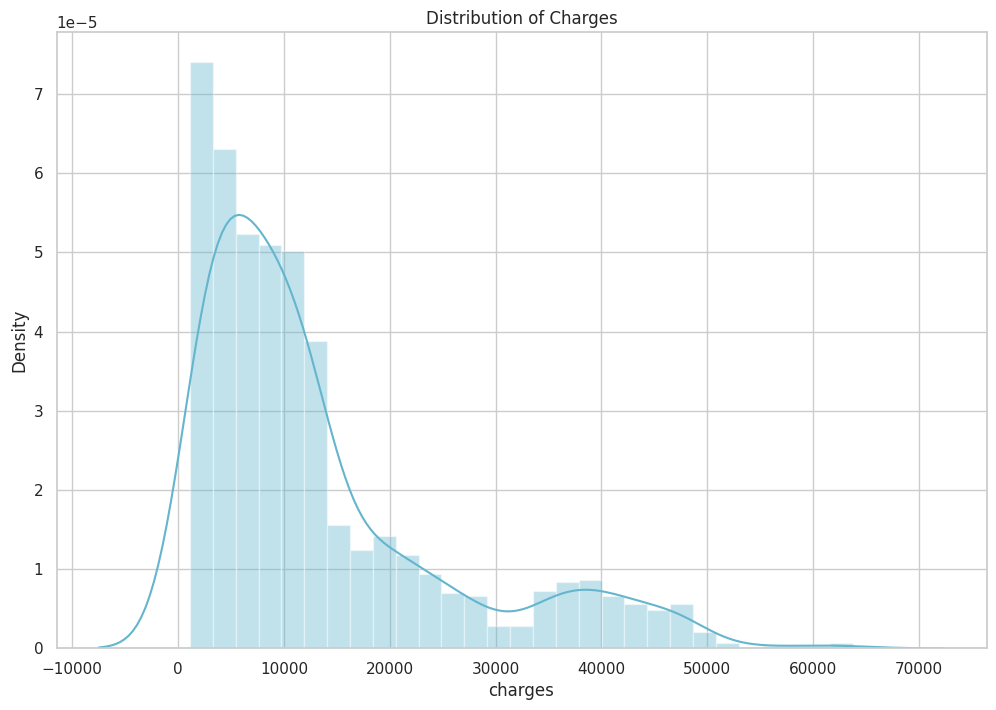

In [13]:
sns.set(style='whitegrid')

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.distplot(
    df['charges'],
    kde=True,
    color='c',
    ax=ax
)

plt.title('Distribution of Charges');

In [14]:
df['log_charges'] = np.log(df['charges'] + 1)


Data terlalu miring (skewed) sehingga tidak mencerminkan normal distribusi. Oleh karena itu apply Natural Log untuk membuat data menjadi distribusi normal atau mencapai varian konstan.

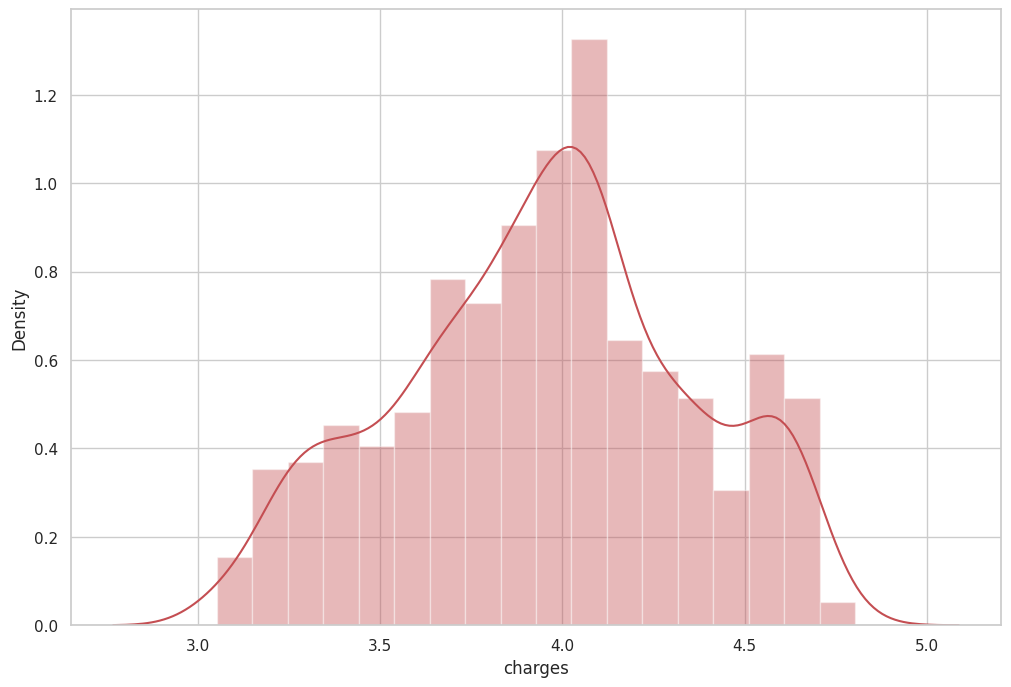

In [17]:
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'r')

**Charge per Region**

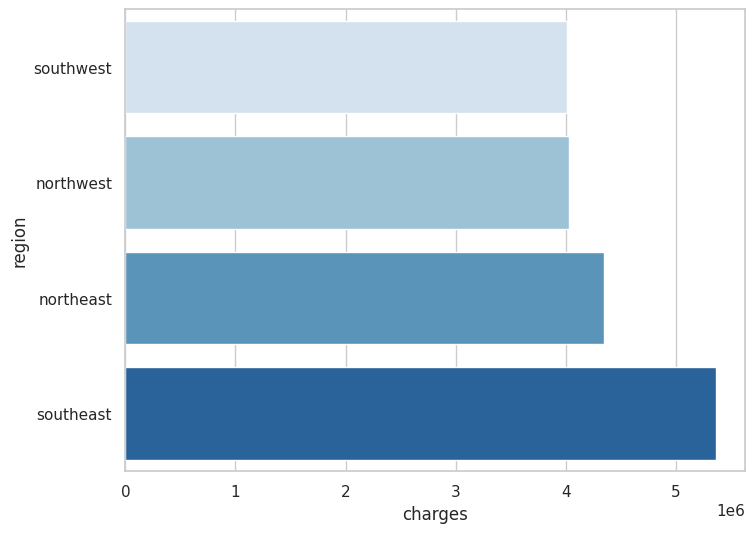

In [18]:
charges_sum = (
    df['charges']
    .groupby(df.region)
    .sum()
    .sort_values(ascending=True)
)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.barplot(
    x=charges_sum.head(),
    y=charges_sum.head().index,
    palette='Blues',
    ax=ax
);

**Charges Per Region Based on Sex**

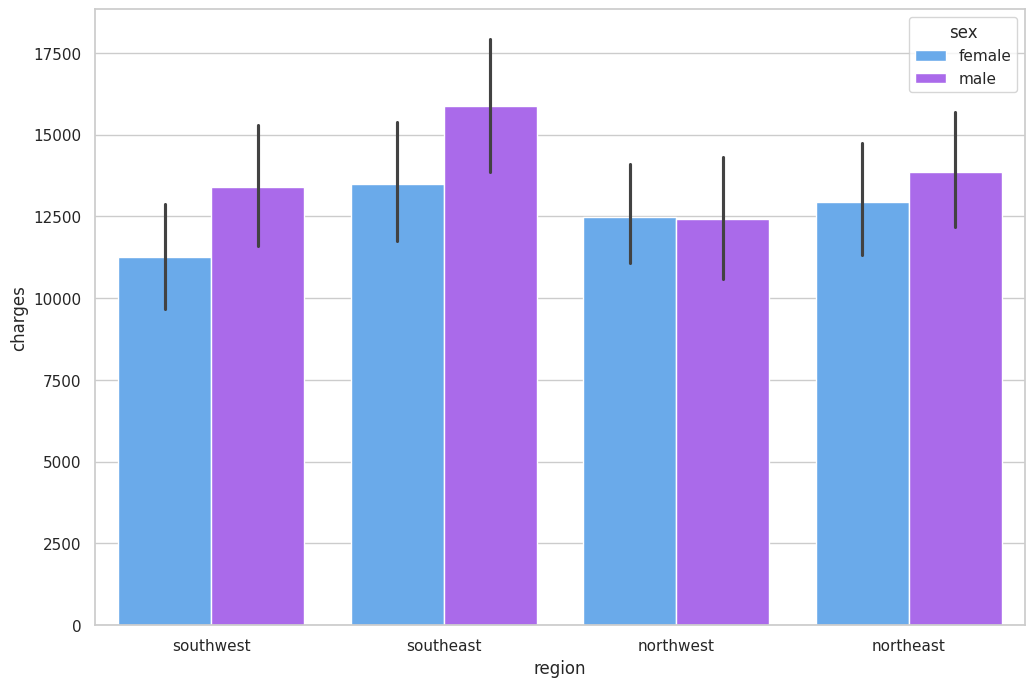

In [19]:
# Multivariate Analysis
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.barplot(
    x='region',
    y='charges',
    hue='sex',
    data=df,
    palette='cool',
    ax=ax
);

**Charges per Region Based on Smoker**

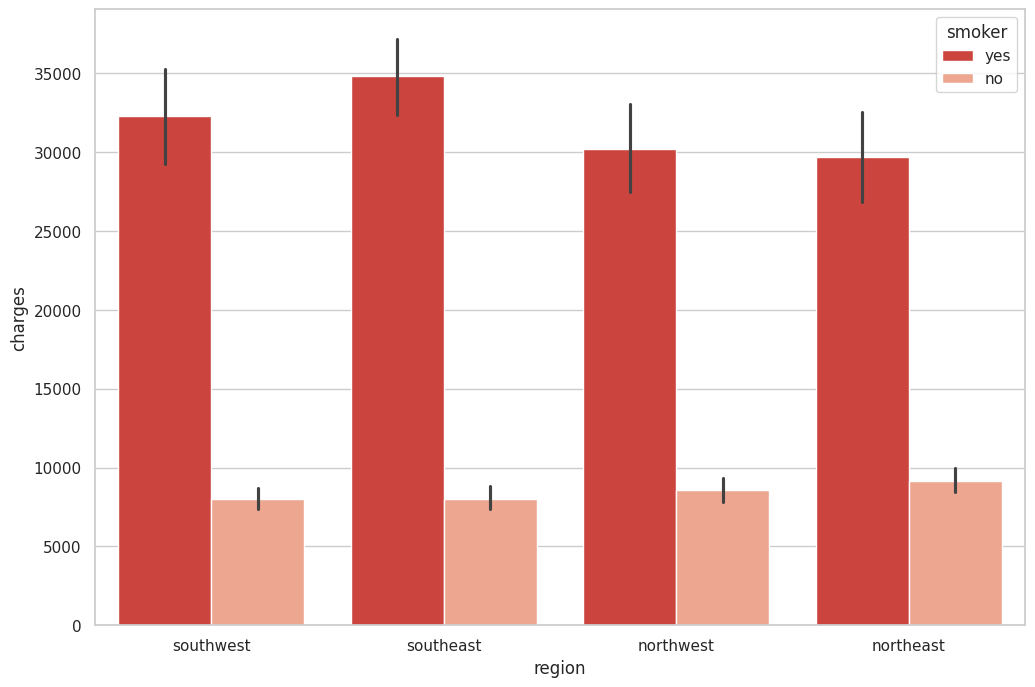

In [20]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(
    x = 'region',
    y = 'charges',
    hue='smoker',
    data=df,
    palette='Reds_r',
    ax=ax
);

**Charges per Region Based on How Many Children**

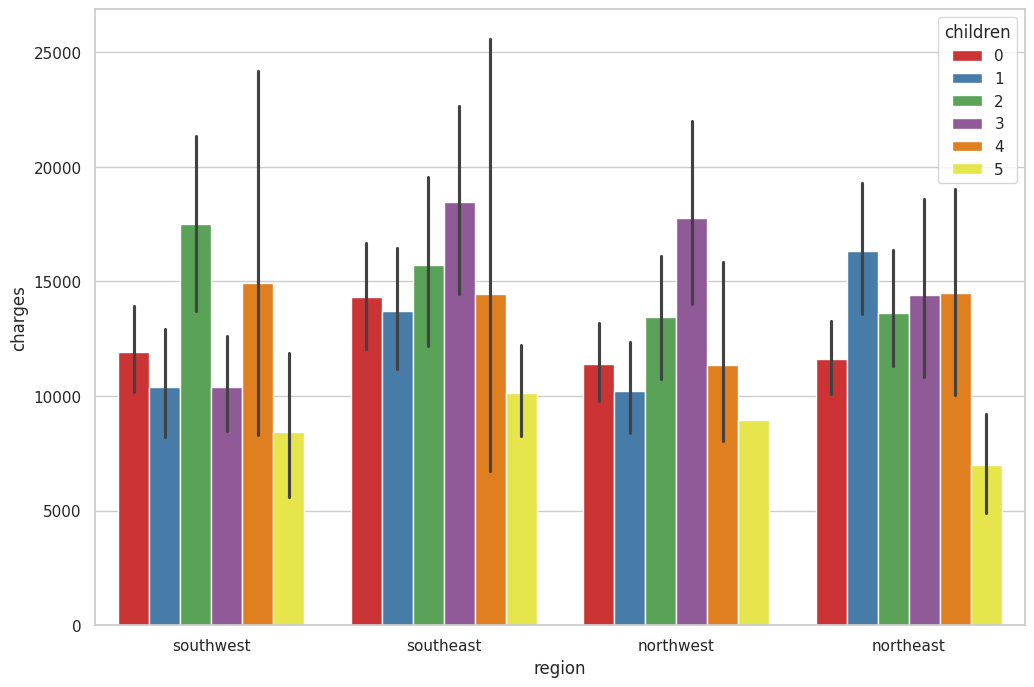

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(
    x='region',
    y='charges',
    hue='children',
    data=df,
    palette='Set1',
    ax=ax
)

# Medical Charges

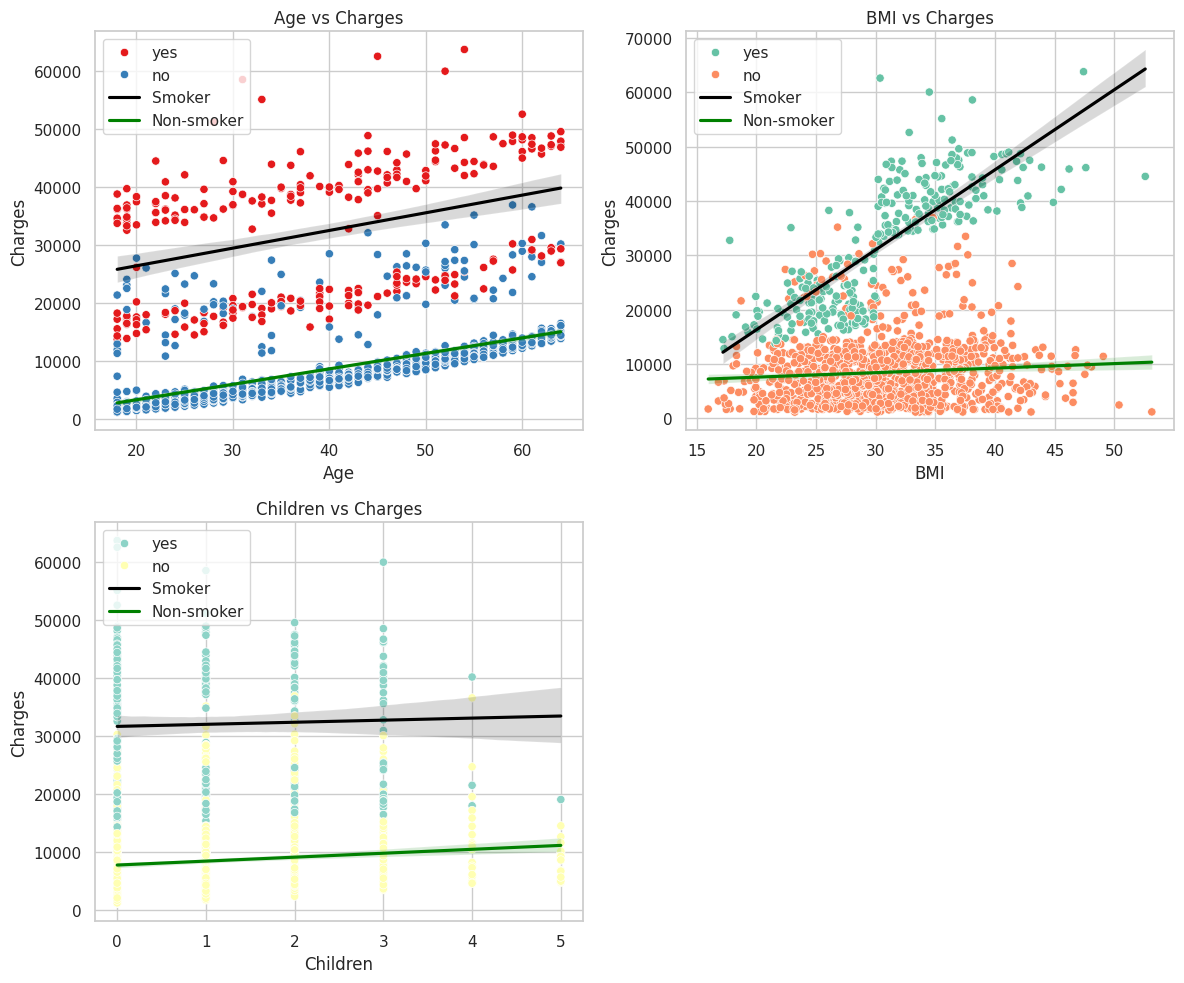

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Age vs Charges
sns.scatterplot(
    x='age', y='charges', data=df, hue='smoker',
    palette='Set1', ax=axs[0, 0], legend=True
)
sns.regplot(
    x='age', y='charges', data=df[df['smoker'] == 'yes'],
    scatter=False, ax=axs[0, 0], color='black', label='Smoker'
)
sns.regplot(
    x='age', y='charges', data=df[df['smoker'] == 'no'],
    scatter=False, ax=axs[0, 0], color='green', label='Non-smoker'
)
axs[0, 0].set_xlabel("Age")
axs[0, 0].set_ylabel("Charges")
axs[0, 0].set_title("Age vs Charges")
axs[0, 0].legend(loc='upper left')

# Plot 2: BMI vs Charges
sns.scatterplot(
    x='bmi', y='charges', data=df, hue='smoker',
    palette='Set2', ax=axs[0, 1], legend=True
)
sns.regplot(
    x='bmi', y='charges', data=df[df['smoker'] == 'yes'],
    scatter=False, ax=axs[0, 1], color='black', label='Smoker'
)
sns.regplot(
    x='bmi', y='charges', data=df[df['smoker'] == 'no'],
    scatter=False, ax=axs[0, 1], color='green', label='Non-smoker'
)
axs[0, 1].set_xlabel("BMI")
axs[0, 1].set_ylabel("Charges")
axs[0, 1].set_title("BMI vs Charges")
axs[0, 1].legend(loc='upper left')

# Plot 3: Children vs Charges
sns.scatterplot(
    x='children', y='charges', data=df, hue='smoker',
    palette='Set3', ax=axs[1, 0], legend=True
)
sns.regplot(
    x='children', y='charges', data=df[df['smoker'] == 'yes'],
    scatter=False, ax=axs[1, 0], color='black', label='Smoker'
)
sns.regplot(
    x='children', y='charges', data=df[df['smoker'] == 'no'],
    scatter=False, ax=axs[1, 0], color='green', label='Non-smoker'
)
axs[1, 0].set_xlabel("Children")
axs[1, 0].set_ylabel("Charges")
axs[1, 0].set_title("Children vs Charges")
axs[1, 0].legend(loc='upper left')

# Remove the empty subplot in the last position
fig.delaxes(axs[1, 1])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# Data Preprocessing

In [23]:
# List of columns to convert to categorical
columns_to_convert = ['sex', 'smoker', 'region']

df[columns_to_convert] = df[columns_to_convert].astype('category')

print(df.dtypes)

age               int64
sex            category
bmi             float64
children          int64
smoker         category
region         category
charges         float64
log_charges     float64
dtype: object


In [24]:
from sklearn.preprocessing import LabelEncoder

# List of columns to encode
columns_to_encode = ['sex', 'smoker', 'region']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col])

# Display the dataframe with encoded values
print(df)

      age  sex     bmi  children  smoker  region      charges  log_charges
0      19    0  27.900         0       1       3  16884.92400     9.734236
1      18    1  33.770         1       0       2   1725.55230     7.453882
2      28    1  33.000         3       0       2   4449.46200     8.400763
3      33    1  22.705         0       0       1  21984.47061     9.998137
4      32    1  28.880         0       0       1   3866.85520     8.260455
...   ...  ...     ...       ...     ...     ...          ...          ...
1333   50    1  30.970         3       0       1  10600.54830     9.268755
1334   18    0  31.920         0       0       0   2205.98080     7.699381
1335   18    0  36.850         0       0       2   1629.83350     7.396847
1336   21    0  25.800         0       0       3   2007.94500     7.605365
1337   61    0  29.070         0       1       1  29141.36030    10.279948

[1337 rows x 8 columns]


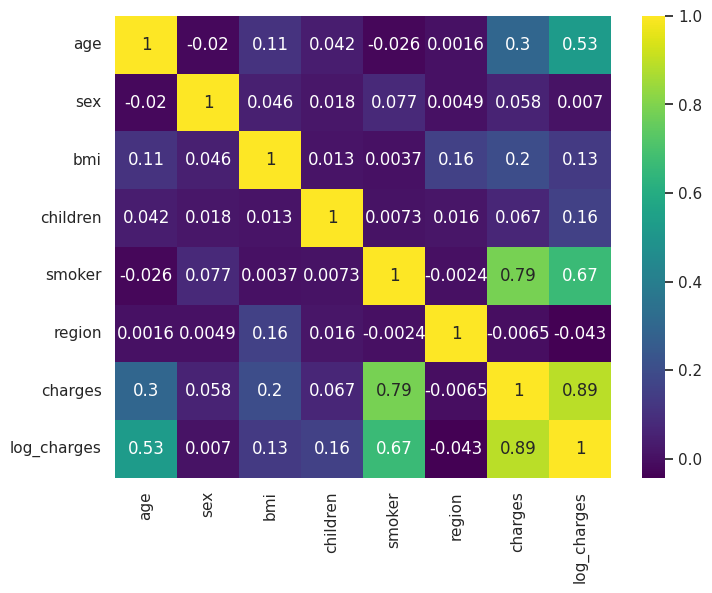

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.heatmap(
    df.corr(), annot=True,
    cmap="viridis", ax=ax
);

# Modeling

In [28]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Prepare predictor variables (X) and target variable (y)
X = df.drop(['charges'], axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Linear Regression**

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model_lr = LinearRegression()

# Latih model pada data training
model_lr.fit(X_train, y_train)

# Prediksi pada data training dan testing
y_train_pred_lr = model_lr.predict(X_train)
y_test_pred_lr = model_lr.predict(X_test)

# Evaluasi performa model
mae_lr = mean_absolute_error(y_test, y_test_pred_lr)
mse_lr = mean_squared_error(y_test, y_test_pred_lr)
r2_lr = r2_score(y_test, y_test_pred_lr)

print(f'Linear Regression:')
print(f'Mean Absolute Error (MAE): {mae_lr:.2f}')
print(f'Mean Squared Error (MSE): {mse_lr:.2f}')
print(f'R-squared on testing set: {r2_lr:.2f}')

Linear Regression:
Mean Absolute Error (MAE): 3065.26
Mean Squared Error (MSE): 20747003.03
R-squared on testing set: 0.89


**Decesion Tree**

In [31]:
from sklearn.tree import DecisionTreeRegressor

# Inisialisasi model Decision Tree Regression
model_dt = DecisionTreeRegressor(random_state=42)

# Latih model pada data training
model_dt.fit(X_train, y_train)

# Prediksi pada data training dan testing
y_train_pred_dt = model_dt.predict(X_train)
y_test_pred_dt = model_dt.predict(X_test)

# Evaluasi performa model
mae_dt = mean_absolute_error(y_test, y_test_pred_dt)
mse_dt = mean_squared_error(y_test, y_test_pred_dt)
r2_dt = r2_score(y_test, y_test_pred_dt)

print(f'Decision Tree Regression:')
print(f'Mean Absolute Error (MAE): {mae_dt:.2f}')
print(f'Mean Squared Error (MSE): {mse_dt:.2f}')
print(f'R-squared on testing set: {r2_dt:.2f}')


Decision Tree Regression:
Mean Absolute Error (MAE): 85.48
Mean Squared Error (MSE): 118244.28
R-squared on testing set: 1.00


**Random Forest**

In [32]:
from sklearn.ensemble import RandomForestRegressor

# Inisialisasi model Random Forest Regression
model_rf = RandomForestRegressor(random_state=42)

# Latih model pada data training
model_rf.fit(X_train, y_train)

# Prediksi pada data training dan testing
y_train_pred_rf = model_rf.predict(X_train)
y_test_pred_rf = model_rf.predict(X_test)

# Evaluasi performa model
mae_rf = mean_absolute_error(y_test, y_test_pred_rf)
mse_rf = mean_squared_error(y_test, y_test_pred_rf)
r2_rf = r2_score(y_test, y_test_pred_rf)

print(f'Random Forest Regression:')
print(f'Mean Absolute Error (MAE): {mae_rf:.2f}')
print(f'Mean Squared Error (MSE): {mse_rf:.2f}')
print(f'R-squared on testing set: {r2_rf:.2f}')


Random Forest Regression:
Mean Absolute Error (MAE): 80.27
Mean Squared Error (MSE): 206480.88
R-squared on testing set: 1.00


model terbaik yang didapat adalah linear regression

In [34]:
# Inisialisasi model Linear Regression
linear_reg = LinearRegression()

# Latih model pada data training
linear_reg.fit(X_train, y_train)

# Lakukan prediksi pada data testing
y_test_pred = linear_reg.predict(X_test)

# Buat DataFrame untuk membandingkan actual dan predicted values
df = pd.DataFrame({
    'Actual': y_test.values,  # y_test adalah target actual
    'Predicted': y_test_pred
})

# Print DataFrame
print(df)


          Actual     Predicted
0     8688.85885   9430.283261
1     5708.86700   5585.872297
2    11436.73815  12742.764672
3    38746.35510  34800.401065
4     4463.20510   6824.589557
..           ...           ...
263  13831.11520  16420.793964
264  13887.20400  15090.876723
265   3925.75820   4691.353403
266  47403.88000  35622.974768
267   8534.67180   9117.108676

[268 rows x 2 columns]


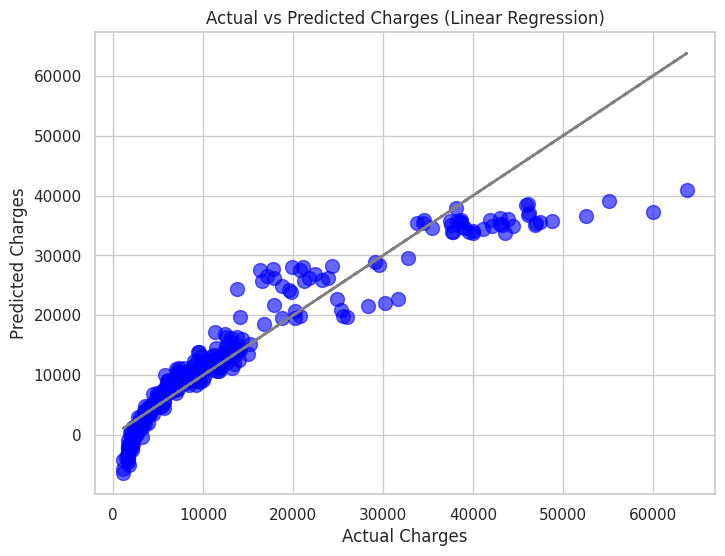

In [40]:
y_test = df['Actual'].values  # Ambil nilai actual dari DataFrame df
y_test_pred = df['Predicted'].values  # Ambil nilai predicted dari DataFrame df

# Plot scatter Actual vs Predicted untuk model Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue', s=100, alpha=0.6)
plt.plot(y_test, y_test, color='gray', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Charges (Linear Regression)')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.grid(True)
plt.show()

In [37]:
import joblib

filename = 'model_lr.pkl'
joblib.dump(model_lr, filename)


['model_lr.pkl']

In [41]:
import pandas as pd

# Simpan DataFrame ke dalam file CSV
df.to_csv('processed_data.csv', index=False)
